In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('evaluation-data.csv')
results.head()

,actual,prob
0,1.0,0.650790
1,1.0,0.772166
2,1.0,0.647421
3,1.0,0.612818
4,1.0,0.596953


In [32]:
results.shape

(5000, 3)

## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

# Question 1
- Determine the distribution of the actual event.
- Would you be concern about bias due to imbalance?

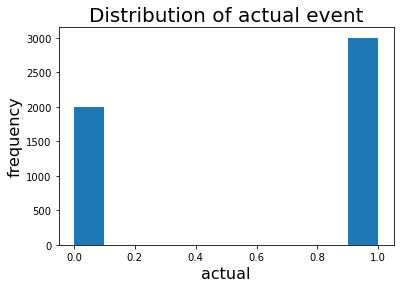

In [80]:
# insert code here
plt.hist(results['actual'])
plt.title('Distribution of actual event',fontsize=20)
plt.xlabel('actual',fontsize=16)
plt.ylabel('frequency',fontsize=16)
plt.show()

Since the class is imbalanced with a higher number of true values there is a chance of bias due to it. Because the model has 1000 less data points to learn the patterns present in the minority class as compared to the majority class.

modest amount of imbalance , but likely not enought to cause any issues. Accuracy will be slightly biased so another measure may be useful.

# Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

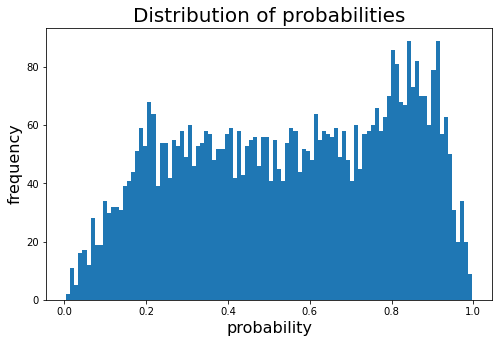

In [82]:
# insert code here
plt.figure(figsize=(8,5))
plt.hist(results['prob'], bins=100)
plt.title('Distribution of probabilities',fontsize=20)
plt.xlabel('probability',fontsize=16)
plt.ylabel('frequency',fontsize=16)
plt.show()

In the distribution we can see the frequency of the values between 0.8 to 1 range is little higher than the other probability range.

# Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [28]:
results['Converted_prob']= results.prob.apply(lambda x: 1 if x > 0.5 else 0) 
results.head()

,actual,prob,Converted_prob
0,1.0,0.650790,1
1,1.0,0.772166,1
2,1.0,0.647421,1
3,1.0,0.612818,1
4,1.0,0.596953,1


In [83]:
# insert code here
true_positive=0
false_positive=0
true_negative=0
false_negative=0


for index, row in results.iterrows():
    if row['actual']==1:
       
        if row['actual']==row['Converted_prob']:
            true_positive+=1
        else:
            false_positive+=1
    if row['actual']==0:
        
        if row['actual']==row['Converted_prob']:
            true_negative+=1
        else:
            false_negative+=1
confusion_matrix=np.array([[true_positive,false_positive],[false_negative,true_negative]])

print(confusion_matrix)

[[2623  377]
 [ 210 1790]]


In the confusion matrix true_positive and true_negative values are higher than false_positive and flase_negative which means the model's performance is good.

# Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model?

In [55]:
# insert code here
accuracy= (true_positive+true_negative) /(true_positive+false_positive+false_negative+true_negative)
print(accuracy)

0.8826


In [56]:
precision = true_positive / (true_positive + false_positive)
print(precision)

0.8743333333333333


In [58]:
recall = true_positive / (true_positive + false_negative)
print(recall)

0.9258736321920226


I would use accuracy as the measure for my model because it is a single measure which summarizes the model. Where precision and recall is appropriate when we want to minimize false positives and minimize false negatives respectively.

used recall for slight imbalance

# Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [88]:
# Insert code here
def true_false_rate(new_vector, y_test):
    
    true_positive = (np.equal(new_vector, 1) & np.equal(y_test, 1)).sum()
    true_negative = (np.equal(new_vector, 0) & np.equal(y_test, 0)).sum()
    false_positive = (np.equal(new_vector, 1) & np.equal(y_test, 0)).sum()
    false_negative = (np.equal(new_vector, 0) & np.equal(y_test, 1)).sum()
    
    true_positive_rate = true_positive / (true_positive + false_negative)
    false_positive_rate = false_positive / (false_positive + true_negative)
    
    return true_positive_rate, false_positive_rate

In [69]:
threshold = [item/100 for item in range(0, 100)]
print(len(threshold))

100


In [104]:

def roc_function(probabilities, y_test):
    roc = np.array([])
    for i in threshold:
        
        new_vector = np.greater_equal(probabilities,i).astype(int)
        tpr, fpr = true_false_rate(new_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

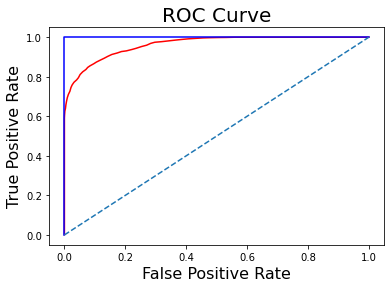

In [105]:
#plt.figure(figsize=(15,7))

ROC_1 = roc_function(results['prob'],results['actual'])
ROC_2 = roc_function(results['prob'],results['Converted_prob'])

plt.plot(ROC_1[:,0],ROC_1[:,1], color = 'r')
plt.plot(ROC_2[:,0],ROC_2[:,1], color= 'b')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.show()

The Receiver Operator Characteristic (ROC) curve shows the diagnostic ability of the classifier. Our model's values are represented by a red line which is closer to the top left corner of the graph and away from the random classifier's diagonal line. Which indicates the model's performance is good. 

Ref:
https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/
https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba